In [903]:
#TASK: Predict whether income exceeds $50K/yr based on census data.

In [904]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [980]:
#Import dataset and using pandas, convert it into a dataframe
Title = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Native Country', 'Income']
traindata = pd.read_table('adult.data', sep=" *, * ", names=Title,engine='python')
testdata = pd.read_table('adult.test', sep=" *, * ", names=Title,engine='python')

In [982]:
#Taking a quick look at the train data
traindata.head(10)

,Age,Workclass,fnlwgt,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [983]:
#View the Test data
testdata.head(10)

,Age,Workclass,fnlwgt,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
7,29,?,227026.0,HS-grad,9.0,Never-married,?,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K.
8,63,Self-emp-not-inc,104626.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K.
9,24,Private,369667.0,Some-college,10.0,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K.


In [984]:
#After taking a quick look at the test data, we realise that there was one unnecessary row which needs to be removed.
testdata.drop(0,axis=0,inplace=True)

In [985]:
#We can see some ? values which indicates that there are some missing values in our dataset which need to be dealt with.

In [986]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Native Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [987]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16281 non-null  object 
 1   Workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   Education       16281 non-null  object 
 4   Education-num   16281 non-null  float64
 5   Marital Status  16281 non-null  object 
 6   Occupation      16281 non-null  object 
 7   Relationship    16281 non-null  object 
 8   Race            16281 non-null  object 
 9   Sex             16281 non-null  object 
 10  Capital Gain    16281 non-null  float64
 11  Capital Loss    16281 non-null  float64
 12  Hours per week  16281 non-null  float64
 13  Native Country  16281 non-null  object 
 14  Income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 2.0+ MB


In [988]:
#Combine the train and test data to deal with missing values. We will later split it to their original form
#once the missing values are filled.
data = traindata.append(testdata)

In [989]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48842 non-null  object 
 1   Workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   Education       48842 non-null  object 
 4   Education-num   48842 non-null  float64
 5   Marital Status  48842 non-null  object 
 6   Occupation      48842 non-null  object 
 7   Relationship    48842 non-null  object 
 8   Race            48842 non-null  object 
 9   Sex             48842 non-null  object 
 10  Capital Gain    48842 non-null  float64
 11  Capital Loss    48842 non-null  float64
 12  Hours per week  48842 non-null  float64
 13  Native Country  48842 non-null  object 
 14  Income          48842 non-null  object 
dtypes: float64(5), object(10)
memory usage: 6.0+ MB


In [990]:
#We see that Age is incorrectly been classified as object. Convert age to float
data['Age'] = data['Age'].astype(float)

In [991]:
#On exploring the dataset, I realised that Education-num is just the numeric representation of the 
#level of education
#Let us create a table to see the number given to each education level
pd.pivot_table(data, index='Education', values='Education-num')

,Education-num
Education,
10th,6.0
11th,7.0
12th,8.0
1st-4th,2.0
5th-6th,3.0
7th-8th,4.0
9th,5.0
Assoc-acdm,12.0
Assoc-voc,11.0


In [992]:
#Let us take a look at the summary of our data
data.describe()

#Insights:
#Mean age is 38 years and std is 13 years
#Minimum age is 17 and maximum is 90 years
#Count tells us that there are no missing values but there actually are. '?' is just a placeholder for NaN values
#On an average, 50% of the people work for 40 hours per week. (And some work for 99 hours!?!)
#75% of the people work for 45 or less hours per week
#Education-num is just the numeric representation of the level of education
#In the table above, you can see the number assigned to each education level
#On an average, 50% of the people have gone to college
#The highest level of education is Doctorate

,Age,fnlwgt,Education-num,Capital Gain,Capital Loss,Hours per week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [993]:
#Replace ? with Na so that it is easier to fill in the missing values
data.replace('?', np.nan, inplace=True)

In [994]:
#Check how many columns have missing values
data.isnull().sum()

Age                  0
Workclass         2799
fnlwgt               0
Education            0
Education-num        0
Marital Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Native Country     857
Income               0
dtype: int64

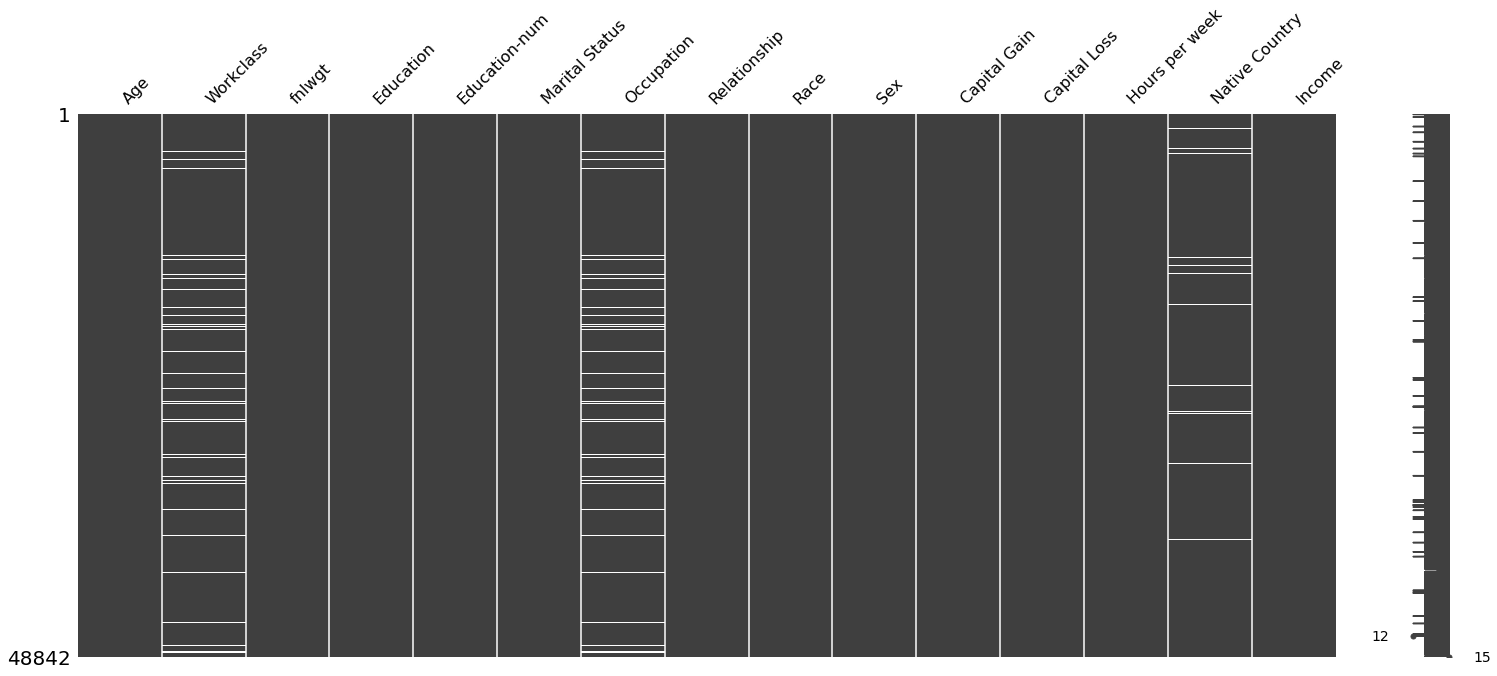

In [995]:
#We can even visualise it!
import missingno as msno
msno.matrix(data)

In [920]:
#The above graph tells us which column has missing values and a fair idea about where the missing values lie.

In [921]:
#There are three columns for which we have missing data - Workclass, Occupation and Native country. All 3 of them are
#very important in determining the income of a person

In [922]:
#We shall fill the missing values by the value that occurs the most in that column

In [996]:
#Calculating the mode
colmode = data.mode(axis=0,numeric_only=False,dropna=True)
print(colmode)

    Age Workclass    fnlwgt Education  Education-num      Marital Status  \
0  36.0   Private  203488.0   HS-grad            9.0  Married-civ-spouse   

       Occupation Relationship   Race   Sex  Capital Gain  Capital Loss  \
0  Prof-specialty      Husband  White  Male           0.0           0.0   

   Hours per week Native Country Income  
0            40.0  United-States  <=50K  


In [997]:
#Let us take a look at the frequency counts of the values for the three columns
data['Workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: Workclass, dtype: int64

In [998]:
data['Occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: Occupation, dtype: int64

In [999]:
data['Native Country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [1000]:
#Now that we have the mode, let's fill in the missing values
data['Workclass'] = data['Workclass'].fillna('Private')
data['Occupation'] = data['Occupation'].fillna('Prof-specialty')
data['Native Country'] = data['Native Country'].fillna('United-States')

In [1001]:
#Confirm that there are no more missing values
data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Native Country    0
Income            0
dtype: int64

In [1002]:
data.head(10)

,Age,Workclass,fnlwgt,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49.0,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31.0,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42.0,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [1003]:
#Check unique values of all categorical columns for any kind of discrepancies in naming
categorical = data.columns[data.dtypes.eq('object')]  #A list of the names of all categorical columns
numeric = data.columns[data.dtypes.eq('float64')]     #A list of the names of all numeric columns


print('Workclass :',data['Workclass'].unique())
print('\n')
print('Education :',data['Education'].unique())
print('\n')
print('Marital-status',data['Marital Status'].unique())
print('\n')
print('occupation',data['Occupation'].unique())
print('\n')
print('Relationship',data['Relationship'].unique())
print('\n')
print('Race',data['Race'].unique())
print('\n')
print('Gender',data['Sex'].unique())
print('\n')
print('Native Country',data['Native Country'].unique())
print('\n')
print('Income',data['Income'].unique())

Workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


Education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


Marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


Relationship ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


Race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


Gender ['Male' 'Female']


Native Country ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 

In [1004]:
#We can see that Income has 4 unique values instead of 2. Let us correct this
data['Income'].replace('>50K.', '>50K', inplace=True)
data['Income'].replace('<=50K.', '<=50K', inplace=True)
data['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [932]:
#DATA VISUALISATION

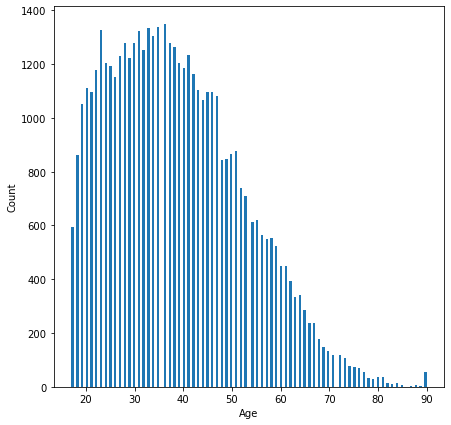

In [933]:
#Let us visualise our data
#Starting with a distribution plot for age to see how the data is distributed age-wise

#Age distribution
fig, ax=plt.subplots(figsize=(7,7))
ax.hist(data['Age'], bins=150)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#Insights:
#Most of the people are below the age of 50 and in the range of 20 to 45

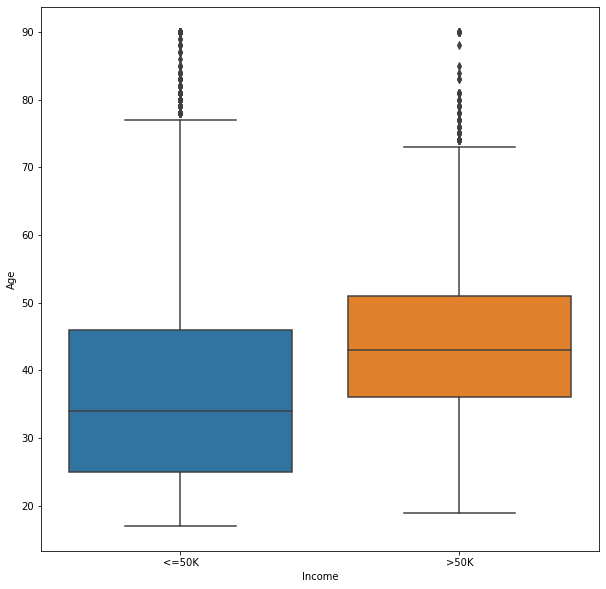

In [1005]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="Income", y="Age", data=data)
plt.show()


#Insights:
#The median age for those earning <=50K is around 35 
#The median age for those earning >50K is around 44 to 45
#The IQR for <=50K is more than >50K
#This implies a greater spread of age in the middle 50% of the values of those earning <=50K
#Outliers are present in both categories

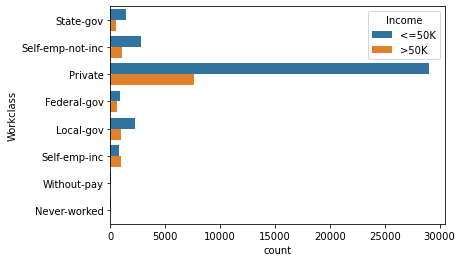

In [934]:
#Workclass vs Income
sns.countplot(data=data, y='Workclass',hue='Income')

#Insights:
#Majority of the people work in Private sector which has the highest scope of earning more than 50K
#A self-employed person has greater chances of earning 50K

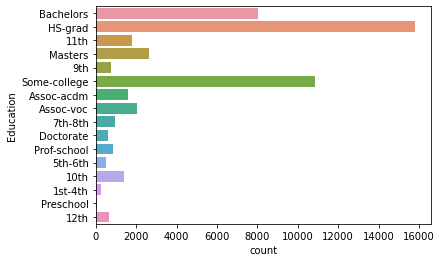

In [935]:
#Education
sns.countplot(data=data, y='Education')

#High School graduates have the maximum number of records followed by some-college and bachelors

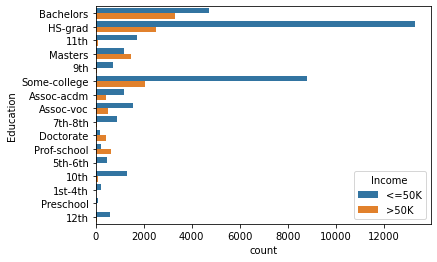

In [936]:
#Education vs Income
sns.countplot(data=data, y='Education',hue='Income')

#Insights:
#Most of the people are High school graduates but very few earn >50K
#Higher the level of education, higher will be the income
#We can see that as the education level increases, the probability of people earning more than 50K also increases
#Here, we see that someone with a Masters degree or a Doctorate is more likely to earn >50K as opposed to someone
#who is just a High school graduate or someone who has not studied more than 11th grade

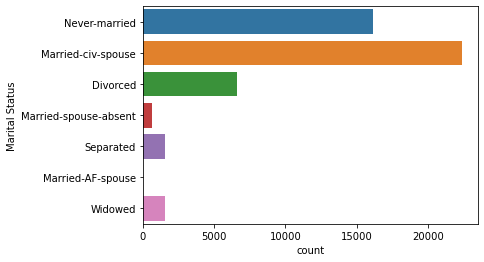

In [937]:
#Marital Status
sns.countplot(data=data, y='Marital Status')

#Married-civ-spouse means spouce is civilian
#Married-AF-spouse means spouce is in Armed forces
#Majority of the people in the data are married to a civilian spouce

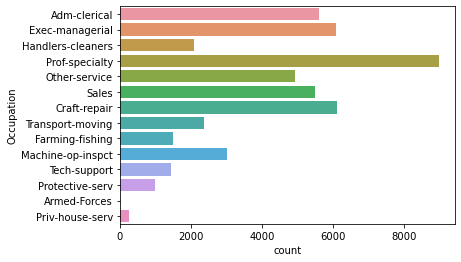

In [938]:
#Occupation 
sns.countplot(data=data, y='Occupation')


#Top 5 observations:
#1. Prof-Specialty
#2. Craft repair and Exec-managerial
#3.Adm- clerical and Sales

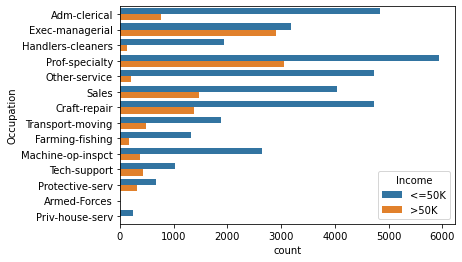

In [939]:
#Occupation vs Income
sns.countplot(data=data, y='Occupation',hue='Income')

#Insights:
#Income heavily depends on the type of occupation. So those with white-collar jobs end up making more money
#This is exactly the case here. A managerial executive is more likely to earn >50K than someone in farming-fishing
#or handlers-cleaners

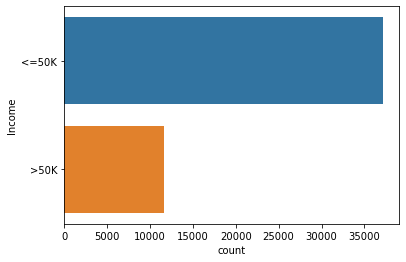

In [940]:
#Income count - Number of people earning >50K and <=50K
sns.countplot(data=data, y='Income')

#Insights:
#Our database has majority of the people earning less than 50K
#People earning more than 50K are almost 1/3rd of those who earn less than 50K
#This tells us that our dataset is imbalanced.

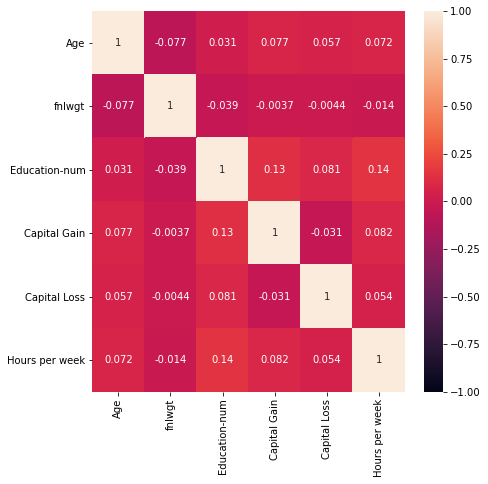

In [941]:
#Heatmap - To see how different variables are correlated with each other
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)

#Insights:
#There is no strong relationship observed between these variables

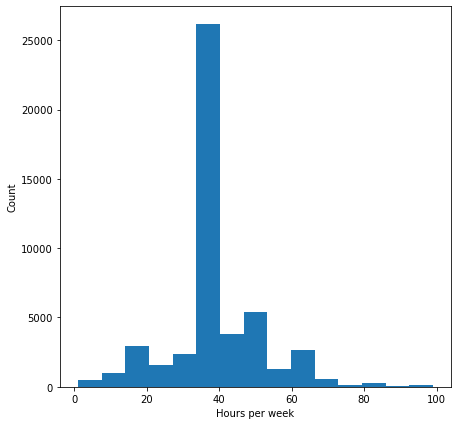

In [942]:
#Hours per week
fig, ax=plt.subplots(figsize=(7,7))
ax.hist(data['Hours per week'], bins=15)
plt.xlabel("Hours per week")
plt.ylabel("Count")
plt.show()

#Insights:
#Majority of the people work for around 35-40 hours

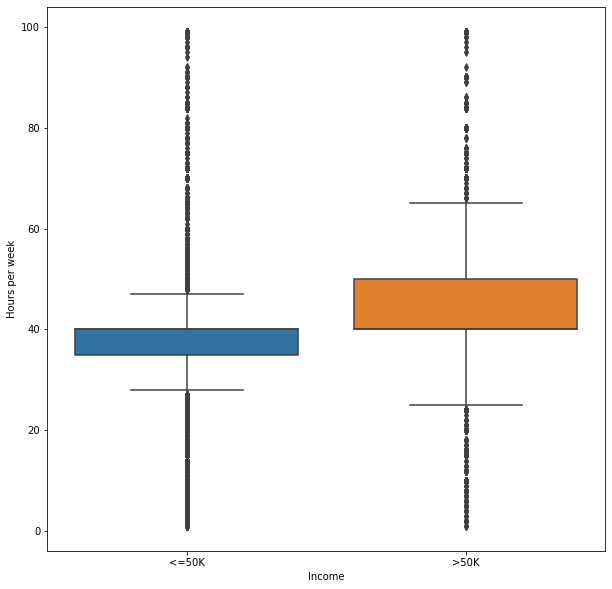

In [1006]:
#Hours per week vs Income
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="Income", y="Hours per week", data=data)
plt.show()

#Insights:
#Outliers are present in both categories but more for those earning <=50K
#The IQR of those >50K is more indicating a greater spread/variablity of hours worked per week
#The median hours per week of those earning >50K is more than those earning <=50K

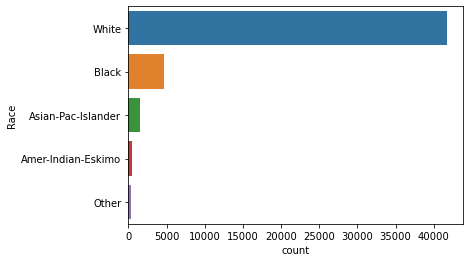

In [1008]:
#Race
sns.countplot(data=data, y='Race')

#There are 5 categories of race
#Most of them are White
#Followed by Black

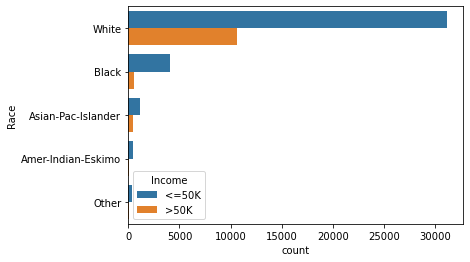

In [944]:
#Race vs Income
sns.countplot(data=data, y='Race',hue='Income')

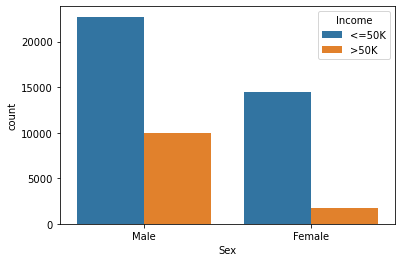

In [945]:
#Gender vs Income
sns.countplot(data=data, x='Sex',hue='Income')

#Insights:
#Although the total number of females is less than males, the % of females earning >50K seems to be much lower
#than % of males earning >50K

In [946]:
#crosstab for gender vs income - % of total earning >50K and <=50K
pd.crosstab(data['Sex'], data['Income'], normalize='index')

Income,<=50K,>50K
Sex,,
Female,0.890749,0.109251
Male,0.696233,0.303767


In [1009]:
#Crosstab of Education of the two genders
pd.crosstab(data['Education'], data['Sex'], normalize='index')

Sex,Female,Male
Education,,
10th,0.329014,0.670986
11th,0.358720,0.641280
12th,0.321157,0.678843
1st-4th,0.246964,0.753036
5th-6th,0.249509,0.750491
7th-8th,0.250262,0.749738
9th,0.291005,0.708995
Assoc-acdm,0.391630,0.608370
Assoc-voc,0.356138,0.643862


In [947]:
#Crosstab of occupation of the two genders
pd.crosstab(data['Occupation'], data['Sex'], normalize='index')

#Insights:
#Females outnumber men in - Adm-clerical, Other services, priv-house-serv

Sex,Female,Male
Occupation,,
Adm-clerical,0.671716,0.328284
Armed-Forces,0.000000,1.000000
Craft-repair,0.052847,0.947153
Exec-managerial,0.287217,0.712783
Farming-fishing,0.063758,0.936242
Handlers-cleaners,0.122587,0.877413
Machine-op-inspct,0.266049,0.733951
Other-service,0.548040,0.451960
Priv-house-serv,0.942149,0.057851


In [ ]:
#Let us proceed to the model building part. But first, there are a few things that need to be done

In [948]:
#Drop unwanted columns - Education-num. Education num is the numerical representation of Education. It is better to
#to have the Education column one hot encoded
data.drop('Education-num', axis=1, inplace=True)

In [949]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16281
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48842 non-null  float64
 1   Workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   Education       48842 non-null  object 
 4   Marital Status  48842 non-null  object 
 5   Occupation      48842 non-null  object 
 6   Relationship    48842 non-null  object 
 7   Race            48842 non-null  object 
 8   Sex             48842 non-null  object 
 9   Capital Gain    48842 non-null  float64
 10  Capital Loss    48842 non-null  float64
 11  Hours per week  48842 non-null  float64
 12  Native Country  48842 non-null  object 
 13  Income          48842 non-null  object 
dtypes: float64(5), object(9)
memory usage: 6.8+ MB


In [950]:
data.head()

,Age,Workclass,fnlwgt,Education,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Income
0,39.0,State-gov,77516.0,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [951]:
#Encode independent categorical data using pandas get dummy
data2 = data.drop('Income', axis=1)
df = data2.columns[data2.dtypes.eq('object')]
data = pd.get_dummies(data, columns=df)
data.head()

,Age,fnlwgt,Capital Gain,Capital Loss,Hours per week,Income,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,...,Native Country_Portugal,Native Country_Puerto-Rico,Native Country_Scotland,Native Country_South,Native Country_Taiwan,Native Country_Thailand,Native Country_Trinadad&Tobago,Native Country_United-States,Native Country_Vietnam,Native Country_Yugoslavia
0,39.0,77516.0,2174.0,0.0,40.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,83311.0,0.0,0.0,13.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,215646.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53.0,234721.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28.0,338409.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [952]:
#Converting Income(dependent) column to a categorical data type to encode its values
data['Income'] = data['Income'].astype('category')
data['Income'].dtype

CategoricalDtype(categories=['<=50K', '>50K'], ordered=False)

In [953]:
#Create a new column which will contain the encoded values. 0 is <=50K and 1 is >50K
data['Income_cat'] = data['Income'].cat.codes
data.head()

,Age,fnlwgt,Capital Gain,Capital Loss,Hours per week,Income,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,...,Native Country_Puerto-Rico,Native Country_Scotland,Native Country_South,Native Country_Taiwan,Native Country_Thailand,Native Country_Trinadad&Tobago,Native Country_United-States,Native Country_Vietnam,Native Country_Yugoslavia,Income_cat
0,39.0,77516.0,2174.0,0.0,40.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50.0,83311.0,0.0,0.0,13.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38.0,215646.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53.0,234721.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28.0,338409.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [954]:
#Drop Income column and rename Income cat as Income
data.drop('Income', axis=1, inplace=True)
data.rename(columns={'Income_cat' : 'Income'}, inplace=True)
data.head()

,Age,fnlwgt,Capital Gain,Capital Loss,Hours per week,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,...,Native Country_Puerto-Rico,Native Country_Scotland,Native Country_South,Native Country_Taiwan,Native Country_Thailand,Native Country_Trinadad&Tobago,Native Country_United-States,Native Country_Vietnam,Native Country_Yugoslavia,Income
0,39.0,77516.0,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50.0,83311.0,0.0,0.0,13.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38.0,215646.0,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53.0,234721.0,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28.0,338409.0,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [955]:
#Splitting into train and test data
train = data[:len(traindata)]
test = data[len(traindata):]

In [956]:
#Now that we have our original train and test datasets, let us perform the train-test split for our ML algorithms
#Train -> Used for training the model
#Test -> Used for testing and understanding how well our model performs

X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

In [957]:
#Before model building, it is important to scale the data i.e get all the data in a fixed range. (usually, it is either 0 to 1 or with mean 0 and std dev 1)
#Scaling is important because otherwise our model will weigh greater values higher and consider smaller values as
#lower, regardless of the unit of the values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [958]:
#MODEL BUILDING

#We will build different classification models and check their  accuracy by using the confusion matrix
#and classification report. Accuracy score is not a great measure in this case because our dataset is imbalanced.
# i.e there are more values for <=50K than >50K.

#We will check precision, recall and f1-score to determine which model is the best
#Precision -> This represents the accuracy of positive predictions i.e 
#How many of those predicted positive were infact actually positive (TP/TP+FP)

#Recall -> This represents the fraction of positives that were correctly identified i.e
#Out of the total true posotoves, how many of them were correctly identified as positive (TP/TP+FN)

#F1 Score -> This function is a weighted average of precision and recall and seeks a balance between the two.
#F1 Score is very useful in cases where you have an imbalanced dataset like ours. Thus the higher the F1-score, 
#the better the model

In [959]:
#LOGISTIC REGRESSION

In [960]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [961]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [1 0]
 [0 0]
 [1 1]]


In [962]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)
print('\n')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[11592   843]
 [ 1590  2256]]


              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.59      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.76      0.78     16281
weighted avg       0.84      0.85      0.84     16281



In [963]:
#KNN CLASSIFIER

In [964]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [965]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [1 0]
 [0 0]
 [1 1]]


In [966]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)
print('\n')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[11252  1183]
 [ 1664  2182]]


              precision    recall  f1-score   support

           0       0.87      0.90      0.89     12435
           1       0.65      0.57      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.76      0.74      0.75     16281
weighted avg       0.82      0.83      0.82     16281



In [967]:
#NAIVE BAYES

In [968]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [969]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [1 1]
 ...
 [1 0]
 [1 0]
 [1 1]]


In [970]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)
print('\n')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[3975 8460]
 [ 156 3690]]


              precision    recall  f1-score   support

           0       0.96      0.32      0.48     12435
           1       0.30      0.96      0.46      3846

    accuracy                           0.47     16281
   macro avg       0.63      0.64      0.47     16281
weighted avg       0.81      0.47      0.48     16281



In [971]:
#DECISION TREE CLASSIFIER

In [972]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [973]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [1 0]
 [0 0]
 [1 1]]


In [974]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)
print('\n')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[10895  1540]
 [ 1480  2366]]


              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12435
           1       0.61      0.62      0.61      3846

    accuracy                           0.81     16281
   macro avg       0.74      0.75      0.74     16281
weighted avg       0.82      0.81      0.82     16281



In [975]:
#RANDOM FOREST CLASSIFIER

In [976]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [977]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [1 0]
 [0 0]
 [1 1]]


In [978]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)
print('\n')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[11555   880]
 [ 1681  2165]]


              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.56      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.84     16281



In [979]:
#Based on the F1-Scores, we can conclude that Logistic regression is the best model, followed by Random Forest
#Classifier